In [1]:
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
import BackwardMultiLayerNet as MLN
import pickle

In [2]:
class AddLayer:
    def __init__(self):
        pass

    def forward(self, x, y):
        out = x + y
        return out

    def backward(self, dout):
        # * 1 相当于 copy
        dx = dout * 1
        dy = dout * 1

        return dx, dy

In [3]:
class MulLayer:
    def __init__(self):
        self.x = None
        self.y = None

    def forward(self, x, y):
        self.x = x
        self.y = y                
        out = x * y

        return out

    def backward(self, dout):
        dx = dout * self.y
        dy = dout * self.x

        return dx, dy

In [4]:
apple = 100
apple_num = 2
tax = 1.1

mul_apple_layer = MulLayer()
mul_tax_layer = MulLayer()

# forward
apple_price = mul_apple_layer.forward(apple, apple_num)
price = mul_tax_layer.forward(apple_price, tax)

# backward
dprice = 1
dapple_price, dtax = mul_tax_layer.backward(dprice)
dapple, dapple_num = mul_apple_layer.backward(dapple_price)

print("price:", int(price))
print("dApple:", dapple)
print("dApple_num:", int(dapple_num))
print("dTax:", dtax)

price: 220
dApple: 2.2
dApple_num: 110
dTax: 200


In [5]:
apple = 100
apple_num = 2
orange = 150
orange_num = 3
tax = 1.1

# layer
mul_apple_layer = MulLayer()
mul_orange_layer = MulLayer()
add_apple_orange_layer = AddLayer()
mul_tax_layer = MulLayer()

# forward
apple_price = mul_apple_layer.forward(apple, apple_num)  # (1)
orange_price = mul_orange_layer.forward(orange, orange_num)  # (2)
all_price = add_apple_orange_layer.forward(apple_price, orange_price)  # (3)
price = mul_tax_layer.forward(all_price, tax)  # (4)

# backward
dprice = 1
dall_price, dtax = mul_tax_layer.backward(dprice)  # (4)
dapple_price, dorange_price = add_apple_orange_layer.backward(dall_price)  # (3)
dorange, dorange_num = mul_orange_layer.backward(dorange_price)  # (2)
dapple, dapple_num = mul_apple_layer.backward(dapple_price)  # (1)

print("price:", int(price))
print("dApple:", dapple)
print("dApple_num:", int(dapple_num))
print("dOrange: %.1f"%(dorange))
print("dOrange_num:", int(dorange_num))
print("dTax:", dtax)


price: 715
dApple: 2.2
dApple_num: 110
dOrange: 3.3
dOrange_num: 165
dTax: 650


In [6]:
# 读入数据
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)
network = MLN.MultiLayerNet([784, 50, 10]);

In [7]:
iters_num = 10000  # 适当设定循环的次数
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.1

train_loss_list = []
train_acc_list = []
test_acc_list = []

iter_per_epoch = max(train_size / batch_size, 1)

for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    #if i > iters_num / 3 :
        #learning_rate = 0.6
    #elif  i > iters_num / 3 * 2 :
        #earning_rate = 0.3
    # 计算梯度 numerical_gradient 效率太低, iters_num = 100 都需要运行很长时间，
    #grad = network.numerical_gradient(x_batch, t_batch)
    gW, gB = network.gradient(x_batch, t_batch)
    
    # 更新参数
    for j in range(network.l):
        network.W[j] -= learning_rate * gW[j]
        network.B[j] -= learning_rate * gB[j]
    
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)
    
    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print("train acc, test acc | " + str(train_acc) + ", " + str(test_acc))

train acc, test acc | 0.15135, 0.153
train acc, test acc | 0.9053333333333333, 0.9071
train acc, test acc | 0.9226666666666666, 0.9231
train acc, test acc | 0.934, 0.9309
train acc, test acc | 0.9432666666666667, 0.9395
train acc, test acc | 0.95015, 0.9458
train acc, test acc | 0.9546, 0.9511
train acc, test acc | 0.9592666666666667, 0.9543
train acc, test acc | 0.9628333333333333, 0.9573
train acc, test acc | 0.9647166666666667, 0.9559
train acc, test acc | 0.9672333333333333, 0.9593
train acc, test acc | 0.9683, 0.9602
train acc, test acc | 0.9727333333333333, 0.9639
train acc, test acc | 0.97295, 0.9647
train acc, test acc | 0.9739833333333333, 0.9658
train acc, test acc | 0.9767166666666667, 0.9661
train acc, test acc | 0.9774, 0.967


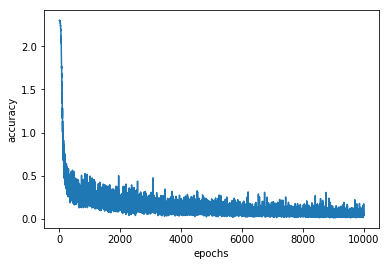

In [8]:
x = np.arange(len(train_loss_list))
plt.plot(x, train_loss_list)
plt.xlabel("epochs")
plt.ylabel("accuracy")
#plt.ylim(0, 1.0)
#plt.legend(loc='lower right')
plt.show()

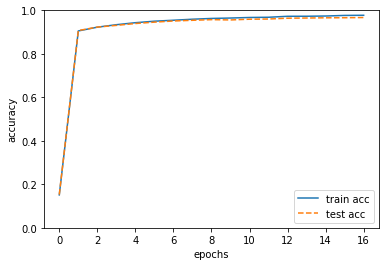

In [9]:
# 绘制图形
markers = {'train': 'o', 'test': 's'}
x = np.arange(len(train_acc_list))
plt.plot(x, train_acc_list, label='train acc')
plt.plot(x, test_acc_list, label='test acc', linestyle='--')
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

In [10]:
def saveNetwork(network):
    print("Creating pickle file ...")
    with open("network05.pkl", 'wb') as f:
        pickle.dump(network, f, -1)
    print("Dump done!")

In [11]:
def loadNetwork():
    with open("network05.pkl", 'rb') as f:
        network = pickle.load(f)
        print("Load done!")
        return network
    return None

In [12]:
saveNetwork(network)
network2 = loadNetwork()

Creating pickle file ...
Dump done!
Load done!


In [13]:
# 用前面一章的测试算法 检测一下这个训练的网络的效果
batch_size = 100 # 批数量
accuracy_cnt = 0

for i in range(0, len(x_test), batch_size):
    x_batch = x_test[i:i+batch_size]
    y_batch = network2.predict(x_batch)
    p = np.argmax(y_batch, axis=1)
    t = t_test[i:i+batch_size]
    t = t.argmax(axis=1)
    accuracy_cnt += np.sum(p == t)

print("Accuracy: %.2f%%" %(float(accuracy_cnt) / len(x_test) * 100))

Accuracy: 96.77%
